In [3]:
import s3fs
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from validate_catalog import all_params
params_dict, cat = all_params()
params_dict.keys()

dict_keys(['GIGATL', 'HYCOM25', 'HYCOM50', 'eNATL60', 'FESOM', 'ORCA36'])

In [5]:
# endpoint_url = 'https://ncsa.osn.xsede.org'
# fs_osn = s3fs.S3FileSystem(anon=True, client_kwargs={'endpoint_url': endpoint_url},)

# url = "s3://Pangeo/pangeo-forge/swot_adac/eNATL60/"
# enatl60_datasets = {
#     ds: xr.open_zarr(fs_osn.get_mapper(f"{url}{ds}.zarr"), consolidated=True)
#     for ds in ["Region01/surface_hourly/fma", "Region02/surface_hourly/fma", 
#                "Region03/surface_hourly/fma"]
# }
# enatl60_datasets

for entry in params_dict.keys():
    print(f"{entry} parameters and their allowable args are:")
    description = cat[entry].describe()
    params = description["user_parameters"]
    if len(params) != 0:
        for i in range(len(params)):
            print(f"""    {params[i]["name"]}: {params[i]["allowed"]}""")            
    else:
        print("    Not implemented.")
    print()

GIGATL parameters and their allowable args are:
    region: ['1', '2']
    datatype: ['surf', 'int']
    season: ['fma', 'aso']

HYCOM25 parameters and their allowable args are:
    region: ['1', '2', '3', '4', '5']
    datatype: ['surface_hourly']
    season: ['fma', 'aso']

HYCOM50 parameters and their allowable args are:
    region: ['1_GS', '2_GE', '3_MD']
    datatype: ['surf', 'int', 'int_wvel', 'grid']
    season: ['fma', 'aso', '']
    grid: ['grid', '']

eNATL60 parameters and their allowable args are:
    region: ['1', '2', '3']
    datatype: ['surface_hourly', 'interior_daily']
    season: ['fma', 'aso']

FESOM parameters and their allowable args are:
    datatype: ['surf', 'int']
    season: ['fma', 'aso']

ORCA36 parameters and their allowable args are:
    region: ['1', '2', '3', '4']
    datatype: ['surface_hourly', 'interior_daily', 'grid']
    season: ['fma', 'aso', '']
    grid: ['bathymetry', 'meshmask', '']



In [7]:
enatl01w = cat.eNATL60(region='1',datatype='surface_hourly', season='fma').to_dask()
enatl01s = cat.eNATL60(region='1',datatype='surface_hourly', season='aso').to_dask()
enatl01w

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 611, y: 763)
Coordinates: (12/15)
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    ...             ...
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables: (12/13)
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    ...             ...
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

In [17]:
enatl01w.lon

<xarray.DataArray 'lon' (y: 763, x: 611)>
dask.array<open_dataset-c81fa99d1b4bed1b82d56bcf34053a31lon, shape=(763, 611), dtype=float32, chunksize=(763, 611), chunktype=numpy.ndarray>
Coordinates: (12/13)
    depth    (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f      (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t      (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u      (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v      (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f      (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    ...       ...
    e2u      (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2v      (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lat      (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon      (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat  (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon  (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
Dimensions without coordinates: y, x

/tmp/ipykernel_327/2159614875.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(enatl01w.lon, enatl01w.lat,
/tmp/ipykernel_327/2159614875.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(enatl01w.lon.isel(y=slice(None,660),x=slice(210,None)),


Text(0, 0.5, '[km]')

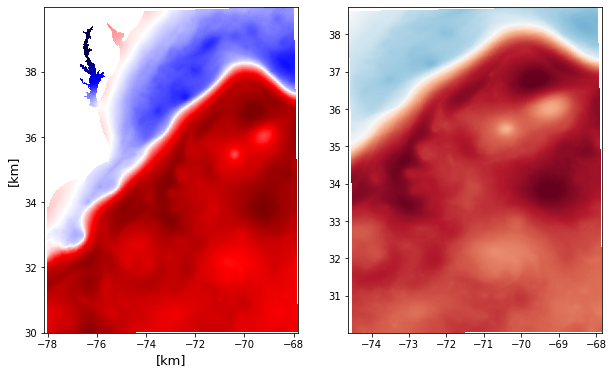

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(10,6))
ax[0].pcolormesh(enatl01w.lon, enatl01w.lat,
              enatl01w.sossheig.isel(time_counter=0), cmap='seismic', vmax=1, vmin=-1)
ax[1].pcolormesh(enatl01w.lon.isel(y=slice(None,660),x=slice(210,None)), 
              enatl01w.lat.isel(y=slice(None,660),x=slice(210,None)),
              enatl01w.sossheig.isel(time_counter=0).isel(y=slice(None,660),x=slice(210,None)), 
              cmap='RdBu_r', vmax=1, vmin=-1)
ax[0].set_xlabel("[km]", fontsize=13)
ax[0].set_ylabel("[km]", fontsize=13)

In [9]:
print(enatl01w.lon.isel(y=slice(None,660),x=slice(210,None)).min().values, 
      enatl01w.lon.isel(y=slice(None,660),x=slice(210,None)).max().values)

-74.62013 -67.84211


In [10]:
print(enatl01w.lat.isel(y=slice(None,660),x=slice(210,None)).min().values, 
      enatl01w.lat.isel(y=slice(None,660),x=slice(210,None)).max().values)

30.005548 38.746174
